In [29]:
import re
import preprocessor as p
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
import seaborn as sns

In [2]:
data = pd.read_csv('./bronze_dataset.csv')

tweets = data['tweet'].tolist()

print(len(tweets))
print(data.columns)

48350
Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'conversation_id', 'created_at',
       'date', 'time', 'timezone', 'user_id', 'username', 'name', 'place',
       'tweet', 'language', 'mentions', 'urls', 'photos', 'replies_count',
       'retweets_count', 'likes_count', 'hashtags', 'cashtags', 'link',
       'retweet', 'quote_url', 'video', 'thumbnail', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest'],
      dtype='object')


/home/sundesh/Documents/git/ITU-Challenge/torch_rl/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (1,2,3,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(data['created_at'].tolist()[4212])
data = data.drop(4212)
print(data['created_at'].tolist()[4212])

[]
2021-07-21 01:49:36 IST


In [4]:
data['created_at'] = data['created_at'].apply(lambda x: x[:19]).astype('datetime64')

In [5]:
data['created_at']

0       2021-09-09 18:16:08
1       2021-09-09 17:54:48
2       2021-09-09 17:52:10
3       2021-09-09 17:39:55
4       2021-09-09 17:31:25
                ...        
48345   2013-02-01 00:30:37
48346   2012-12-06 03:49:21
48347   2012-10-05 02:21:41
48348   2012-08-26 04:55:03
48349   2012-08-21 20:05:08
Name: created_at, Length: 48349, dtype: datetime64[ns]

In [21]:
created_at = data['created_at'].tolist()

In [22]:
x = np.array(sorted(created_at))

In [23]:
y = np.arange(x.shape[0])

Text(0.5, 1.0, 'Number of Tweets for #vaccine per year')

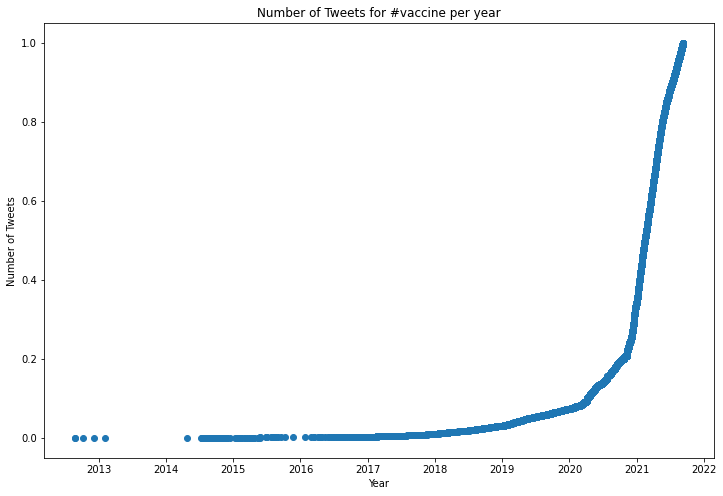

In [25]:
plt.scatter(x, y)
plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets for #vaccine per year')

Text(0.5, 1.0, 'Number of Tweets for #vaccine per year')

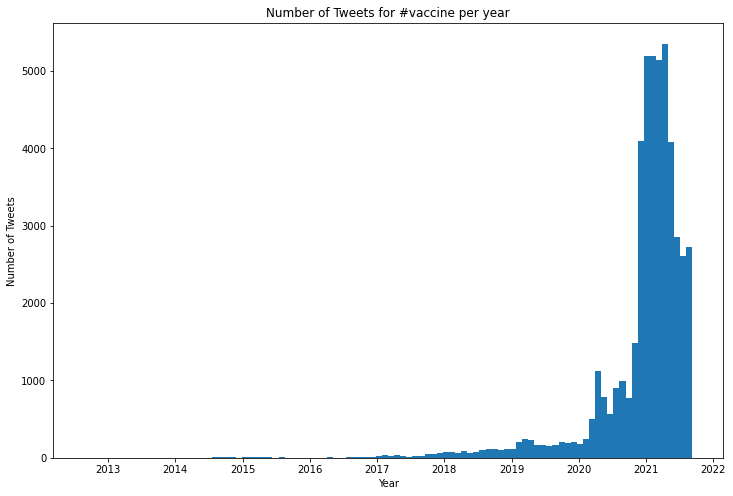

In [81]:
plt.hist(x, bins=100)
plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets for #vaccine per year')

(50,) (51,)


Text(0.5, 1.0, 'Number of Tweets for #vaccine per year')

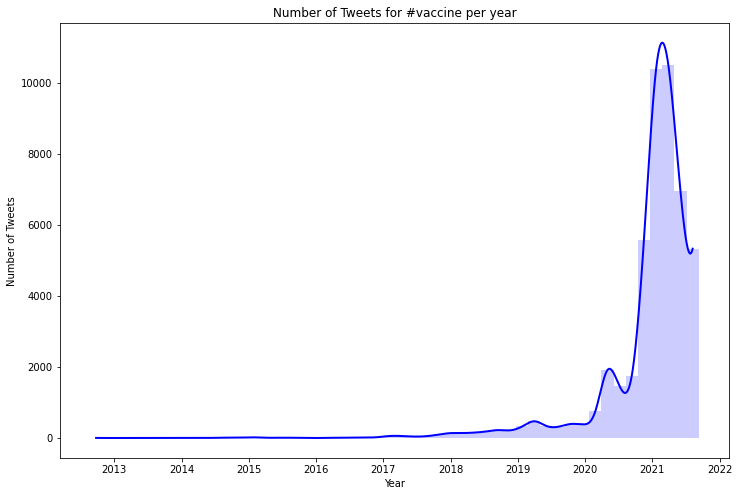

In [150]:
import scipy.stats as stats
# noise = np.random.normal(0, 1, (1000, ))
t1, t2, _ = plt.hist(x, bins=50, color = 'b', alpha = 0.2)
print(t1.shape, t2.shape)
# density = stats.gaussian_kde(x)
new_t2 = list()
for i in range(1, len(t2)):
    new_t2.append((t2[i]+t2[i-1])/2)
from scipy.interpolate import make_interp_spline, BSpline
t1 = np.array(t1)
new_t2 = np.array(new_t2)

# 300 represents number of points to make between T. and T.max
xnew = np.linspace(new_t2.min(), new_t2.max(), 100000)  

spl = make_interp_spline(new_t2, t1)

power_smooth = spl(xnew)

plt.plot(xnew, power_smooth, color = 'b', linewidth=2.0, alpha = 1)
# plt.close()
plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets for #vaccine per year')

In [93]:
print(t1)

[2.000e+00 1.000e+00 0.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 3.000e+00
 5.000e+00 5.000e+00 5.000e+00 9.000e+00 3.000e+00 7.000e+00 1.200e+01
 4.000e+00 4.000e+00 5.000e+00 3.000e+00 5.000e+00 3.000e+00 1.000e+00
 1.000e+00 0.000e+00 1.000e+00 1.000e+00 3.000e+00 6.000e+00 3.000e+00
 3.000e+00 8.000e+00 4.000e+00 1.100e+01 9.000e+00 1.200e+01 2.300e+01
 3.200e+01 2.500e+01 3.300e+01 2.700e+01 1.600e+01 2.300e+01 2.600e+01
 4.500e+01 4.500e+01 6.400e+01 7.200e+01 7.200e+01 6.800e+01 8.500e+01
 6.700e+01 8.100e+01 1.020e+02 1.120e+02 1.110e+02 9.900e+01 1.180e+02
 1.160e+02 2.100e+02 2.390e+02 2.320e+02 1.700e+02 1.680e+02 1.510e+02
 1.690e+02 2.060e+02 1.900e+02 2.100e+02 1.740e+02 2.450e+02 5.020e+02
 1.122e+03 7.900e+02 5.640e+02 8.970e+02 9.870e+02 7.670e+02 1.487e+03
 4.098e+03 5.193e+03 5.199e+03 5.149e+03 5.356e+03 4.090e+03 2.852e+03
 2.604

In [135]:
after_2020 = x[x > np.datetime64('2020-01-01')]

(20,) (21,)


Text(0.5, 1.0, 'Number of Tweets for #vaccine per year after Jan 2020 till Sep 2021')

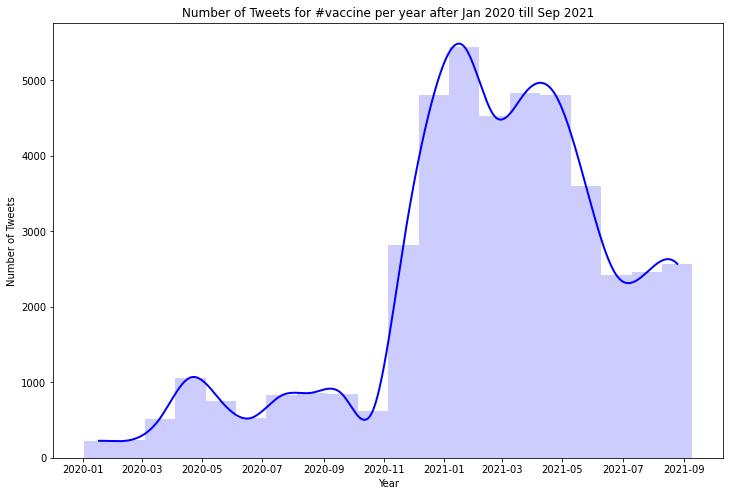

In [146]:
# plt.hist(after_2020, bins=20)
t1, t2, _ = plt.hist(after_2020, bins=20, color = 'b', alpha = 0.2)
print(t1.shape, t2.shape)
# density = stats.gaussian_kde(x)
new_t2 = list()
for i in range(1, len(t2)):
    new_t2.append((t2[i]+t2[i-1])/2)

from scipy.interpolate import make_interp_spline, BSpline
t1 = np.array(t1)
new_t2 = np.array(new_t2)

# 300 represents number of points to make between T. and T.max
xnew = np.linspace(new_t2.min(), new_t2.max(), 100000)  

spl = make_interp_spline(new_t2, t1)

power_smooth = spl(xnew)

plt.plot(xnew, power_smooth, color = 'b', linewidth=2.0, alpha = 1)
plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets for #vaccine per year after Jan 2020 till Sep 2021')

In [84]:
silver = data[(data['created_at'] >= pd.to_datetime('2021-01-01')) & (data['created_at'] <= pd.to_datetime('2021-03-31'))]
len(silver)

14348

In [85]:
silver['tweet'].tolist()

['BAIT &amp; SWITCH: Scientists Now Saying That Current COVID Vaccines Will Be Ineffective Within In A Year And Everyone Gets Jabbed Again And Again #VaccinePassport #vaccine #BillGatesBioTerrorist #NowTheEndBegins #MarkOfTheBeast',
 'Wont this create a two tier system of living? Wouldnt this fall under discrimination? #vaccine #Equality #openireland',
 'In #Italy obligatory vaccination for doctors, nurses and health workers will come this week with a decree law. #Europe #EU #vaccine',
 'Todays excitement was twofold: a) sitting outside in the sunshine playing our evening round of wind down #rummy AND b) getting a call to book BOTH of us in for our second Pfizering. Thursday it is then. #COVID19 #vaccine',
 'Primary care physicians are a trusted resource and experts in vaccination. Getting PCPs the #COVID19 #vaccine is how we improve access, hesitancy, and equity.',
 'I seriously never want to see a palm tree, cross walk, chimney, motorcycle, bus, mountains, traffic lights, fire hydran

In [86]:
silver.to_csv('./silver_dataset.csv')